# Task 1

## Set up

In [74]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

### Fourier Transform

In [75]:
# Set parameters for the signal
# N = 512           # Number of sample points
# T = 1.0           # Duration of the signal in seconds
# f0 = 1            # Fundamental frequency of the square wave in Hz

N = 2048          # Number of sample points
T = 1.0           # Duration of the signal in seconds
f0 = 1            # Fundamental frequency of the square wave in Hz

# N = 4096          # Number of sample points
# T = 1.0           # Duration of the signal in seconds
# f0 = 1            # Fundamental frequency of the square wave in Hz

# List of harmonic numbers used to construct the square wave
harmonics = [1, 3, 5, 20, 50]

# Define the square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

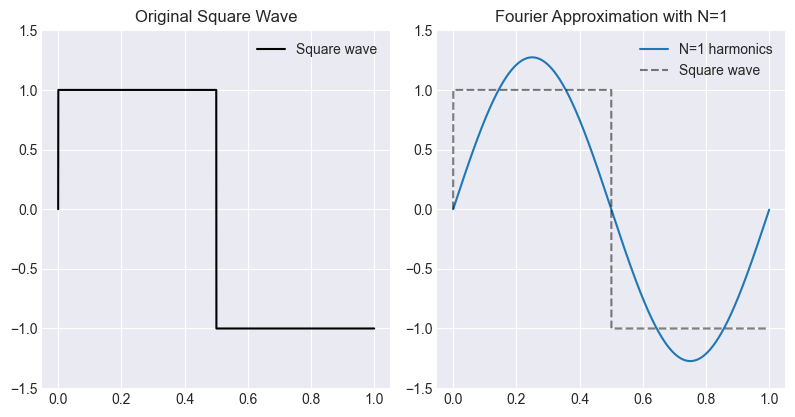

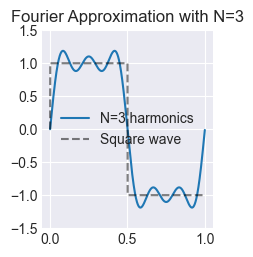

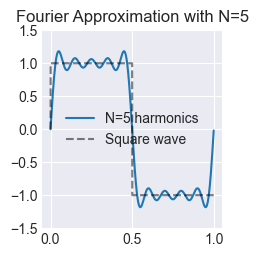

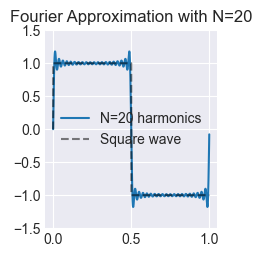

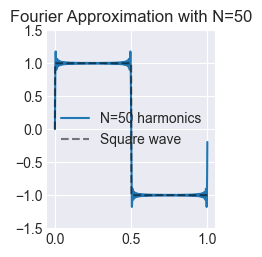

In [76]:
# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        # The Fourier series of a square wave contains only odd harmonics.
        n = 2 * k + 1
        # Add harmonics to reconstruct the square wave.
        result += np.sin(2 * np.pi * n * f0 * t) / n
    return (4 / np.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)

# Generate the original square wave
square = square_wave(t)
plt.figure(figsize=(12, 8))

# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()

# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

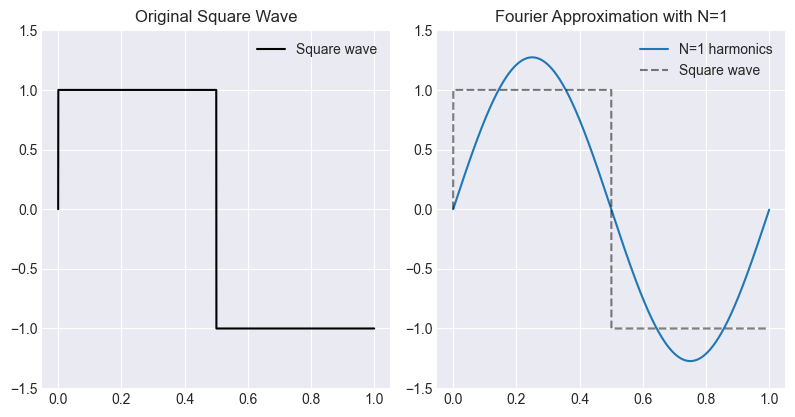

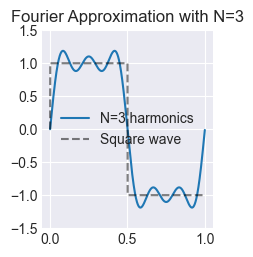

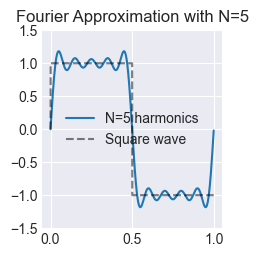

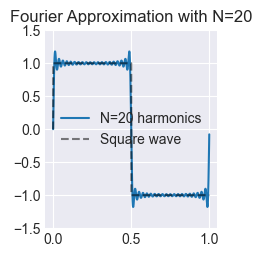

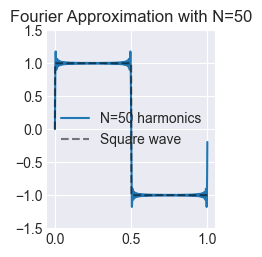

In [77]:
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        # The Fourier series of a square wave contains only odd harmonics.
        n = 2 * k + 1
        # Add harmonics to reconstruct the square wave.
        result += np.sin(2 * np.pi * n * f0 * t) / n
    return (4 / np.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)

# Generate the original square wave
square = square_wave(t)
plt.figure(figsize=(12, 8))

# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()

# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Discrete Fourier Transform (DFT)

--- DFT/FFT Performance Comparison---
Naïve DFT Execution Time: 4.559893 seconds
NumPy FFT Execution Time: 0.000000 seconds
FFT was too fast to measure a significant duration difference.

Our DFT implementation is close to NumPy's FFT: True


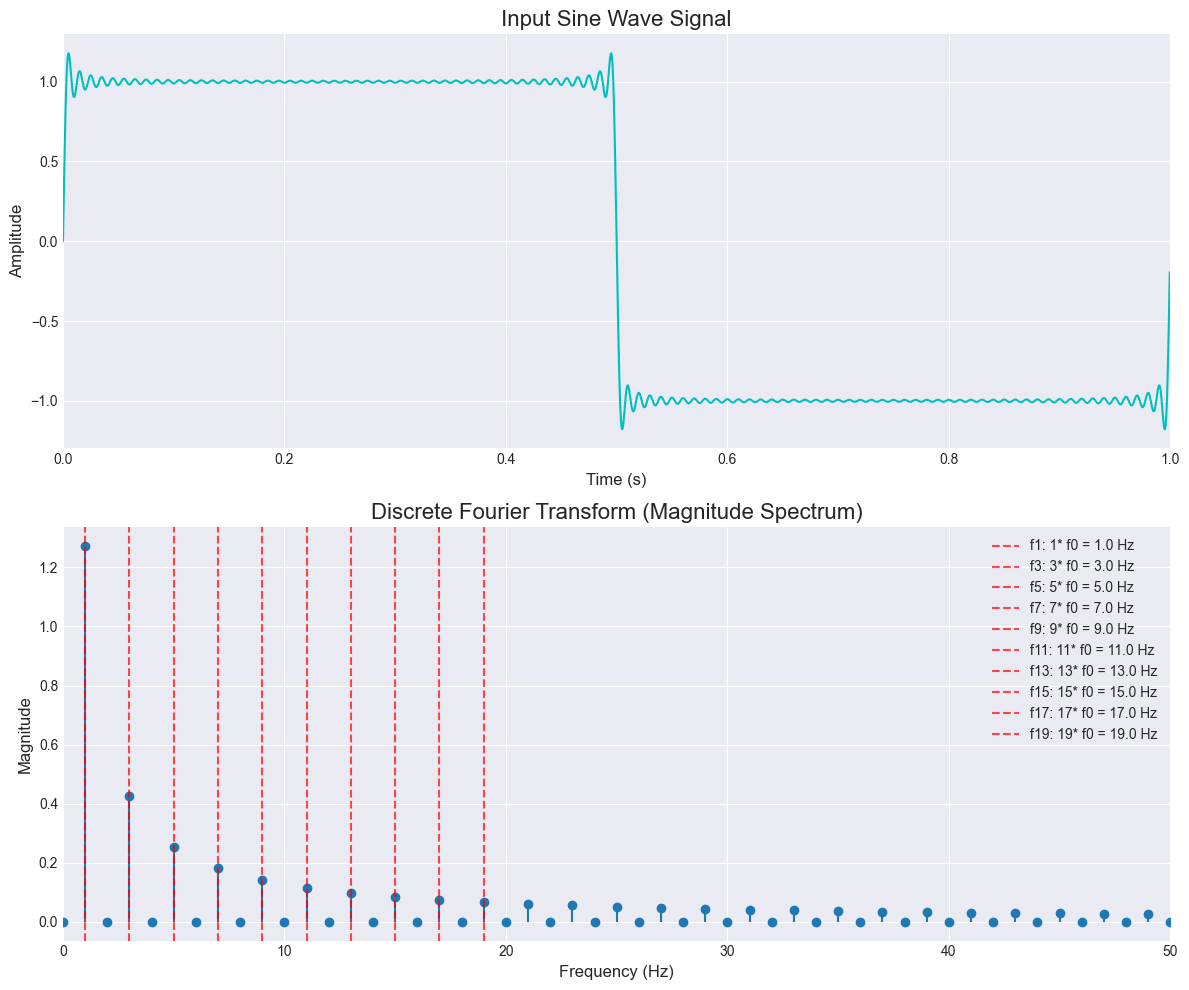

In [78]:
# 2. Apply the DFT and time the execution
def naive_dft(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array.
    3
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)
    # Iterate through each frequency bin (k)
    for k in range(N):
    # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X

# Construct a square wave using 50 harmonics
signal = square_wave_fourier(t, f0, 50)

# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(signal)
end_time_naive = time.time()
naive_duration = end_time_naive- start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(signal)
end_time_fft = time.time()
fft_duration = end_time_fft- start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")

# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")

# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, d=T/N)[:N//2]
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t, signal, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0) # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50) # Focus on lower frequencies
ax2.grid(True)

# Add vertical lines for the first ten frequencies
for i in range(20):
    if i < len(xf) and i % 2 == 1: # Only plot odd harmonics
        ax2.axvline(xf[i], color='r', linestyle='--', alpha=0.7, label=f'f{i}: {i}* f0 = {xf[i]:.1f} Hz')
        
# Only show labels for first 3 frequencies to avoid cluttering
ax2.legend()
plt.tight_layout()
plt.show()

## PyTorch reconstruction

### Fourier Transform

In [ ]:
# List of harmonic numbers used to construct the square wave
harmonics = [1, 3, 5, 20, 50]

# Define the square wave function
def square_wave(t):
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))

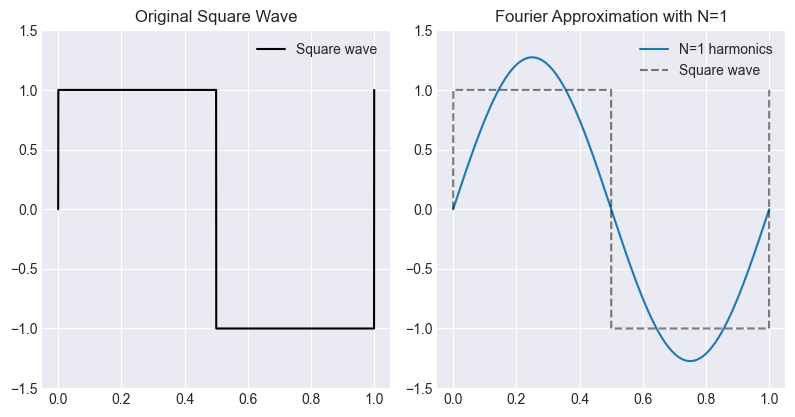

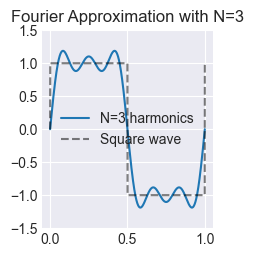

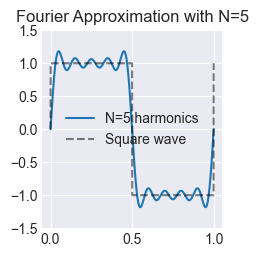

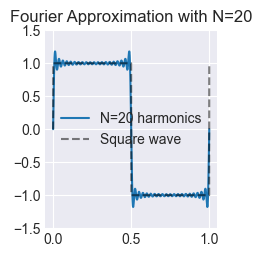

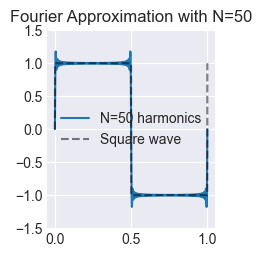

In [80]:
# Fourier series approximation of the square wave using PyTorch
def square_wave_fourier(t: torch.Tensor, f0: float, N: int) -> torch.Tensor:
    result = torch.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1  # odd harmonics
        result += torch.sin(2.0 * torch.pi * n * f0 * t) / n
    return (4 / torch.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = torch.linspace(0.0, T, N)

# Generate the original square wave
square = square_wave(t)
plt.figure(figsize=(12, 8))

# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()

# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Discrete Fourier Transform (DFT)

--- DFT/FFT Performance Comparison---
Naïve DFT (CPU, Torch) Execution Time: 0.029349 seconds
Naïve DFT (GPU, Torch) Execution Time: 0.000000 seconds
NumPy FFT Execution Time: 0.000000 seconds
FFT was too fast to measure a significant duration difference.

Torch CPU DFT close to NumPy FFT: False
Torch GPU DFT close to NumPy FFT: False


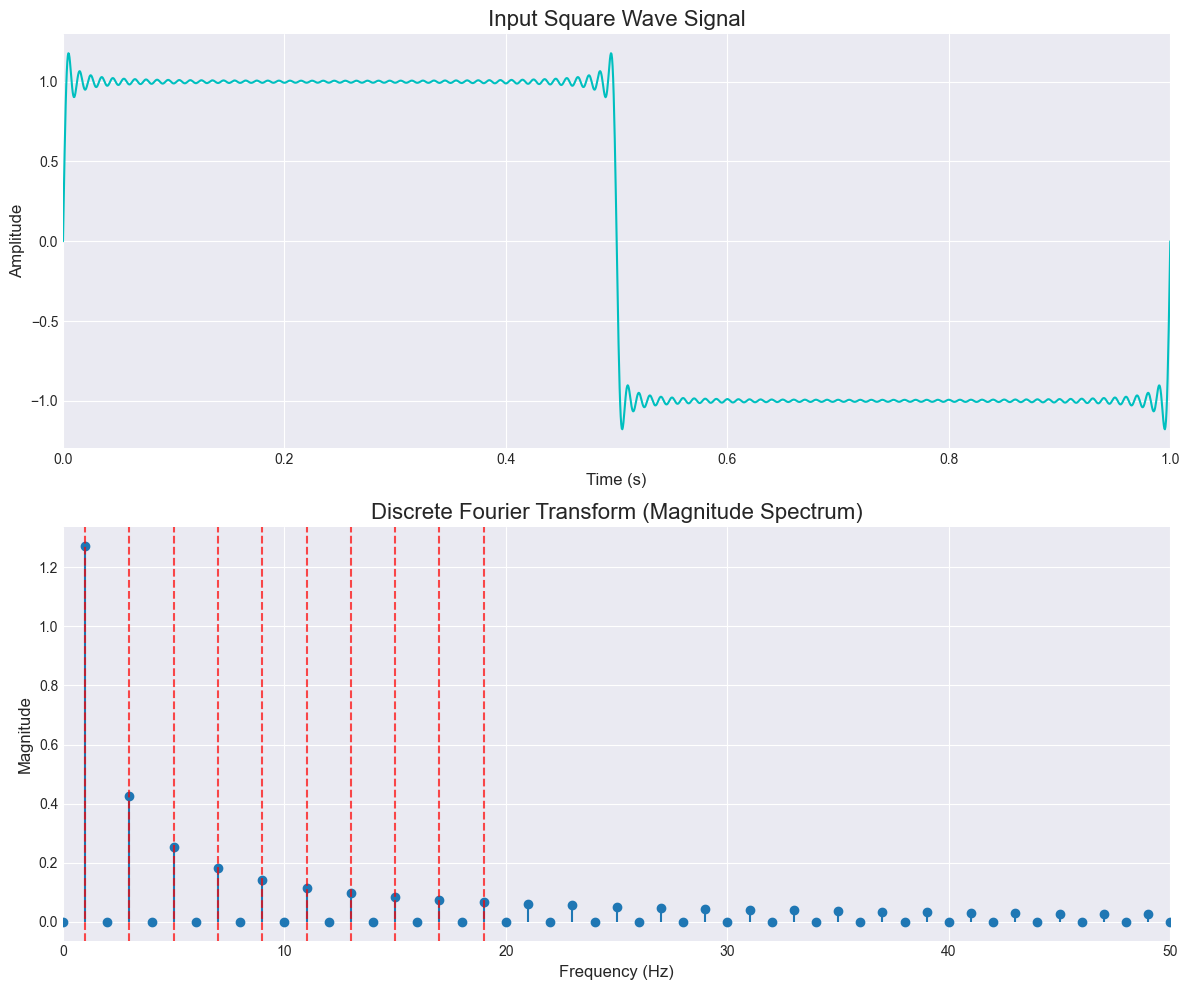

In [82]:
# 2. Apply the DFT and time the execution
# Naive DFT using PyTorch (CPU)
def naive_dft_torch_cpu(x: torch.Tensor) -> torch.Tensor:
    """
    Naive Discrete Fourier Transform (DFT) using PyTorch on CPU.
    O(N^2) implementation, mirrors the original NumPy version.
    """
    N = x.shape[0]
    n = torch.arange(N, device=x.device, dtype=torch.float32)
    k = n.view(-1, 1)  # column vector

    # Compute the DFT matrix (complex)
    M = torch.exp(-2j * torch.pi * k * n / N)

    # Ensure input is complex
    x_complex = x.to(torch.complex64)

    return torch.matmul(M, x_complex)


# Naive DFT using PyTorch (GPU)
def naive_dft_torch_gpu(x: torch.Tensor) -> torch.Tensor:
    """
    Naive Discrete Fourier Transform (DFT) using PyTorch on GPU.
    Explicit GPU version (no torch.fft).
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    x = x.to(device)

    N = x.shape[0]
    n = torch.arange(N, device=device, dtype=torch.float32)
    k = n.view(-1, 1)

    # Compute the DFT matrix (complex)
    M = torch.exp(-2j * torch.pi * k * n / N)

    # Ensure input is complex
    x_complex = x.to(torch.complex64)

    return torch.matmul(M, x_complex)

# Construct a square wave using 50 harmonics (PyTorch)
signal = square_wave_fourier(t, f0, 50)

# Run CPU version
start_time_naive = time.time()
dft_result_torch = naive_dft_torch_cpu(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Run GPU version
start_time_gpu = time.time()
dft_result_gpu = naive_dft_torch_gpu(signal)
end_time_gpu = time.time()
gpu_duration = end_time_gpu - start_time_gpu

# Convert tensors back to NumPy for comparison/plotting
signal_np = signal.cpu().numpy()
dft_cpu_np = dft_result_torch.cpu().numpy()
dft_gpu_np = dft_result_gpu.cpu().numpy()

# Run NumPy FFT for verification
start_time_fft = time.time()
fft_result = np.fft.fft(signal_np)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison---")
print(f"Naïve DFT (CPU, Torch) Execution Time: {naive_duration:.6f} seconds")
print(f"Naïve DFT (GPU, Torch) Execution Time: {gpu_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")

if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster than naive CPU DFT.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Check closeness
print(f"\nTorch CPU DFT close to NumPy FFT: {np.allclose(dft_cpu_np, fft_result, atol=1e-5)}")
print(f"Torch GPU DFT close to NumPy FFT: {np.allclose(dft_gpu_np, fft_result, atol=1e-5)}")

# 4. Prepare for Plotting (use CPU DFT result for spectrum)
xf = np.fft.fftfreq(N, d=T/N)[:N//2]
magnitude = 2.0/N * np.abs(dft_cpu_np[0:N//2])

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t.cpu().numpy(), signal_np, color='c')
ax1.set_title('Input Square Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0)
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50)
ax2.grid(True)

# Add vertical lines for first 10 odd harmonics
for i in range(20):
    if i < len(xf) and i % 2 == 1:
        ax2.axvline(xf[i], color='r', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
